In [542]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [543]:
con = sqlite3.connect("../data/checking-logs.sqlite.sqlite copy")

## create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits
## do not take project1 into account for calculations of the average difference and the number of commits
## take the number of commits from the checker table

In [546]:
query = "SELECT AVG((strftime('%s', t.first_commit_ts) - d.deadlines) / 3600) AS 'avg_diff', pageviews, num_commits \
         FROM test t JOIN deadlines d ON t.labname=d.labs \
         JOIN (SELECT uid, COUNT(timestamp) AS 'num_commits' FROM checker WHERE status='ready' AND uid LIKE 'user_%' AND labname IS NOT 'project1' GROUP BY uid) AS c ON t.uid=c.uid \
         JOIN (SELECT uid, COUNT(datetime) AS 'pageviews' FROM pageviews WHERE uid IN (SELECT uid FROM checker WHERE status='ready' AND uid LIKE 'user_%' AND labname IS NOT 'project1' GROUP BY uid) GROUP BY uid) AS p ON t.uid=p.uid WHERE t.labname IS NOT 'project1' GROUP BY c.uid;"
df = pd.io.sql.read_sql(query, parse_dates=['datetime'], con=con)
df

,avg_diff,pageviews,num_commits
0,-64.400000,28,35
1,-74.800000,89,13
2,-159.000000,143,33
3,-61.600000,47,29
4,-5.666667,3,4
5,-98.750000,16,62
6,-95.500000,10,35
7,-92.600000,179,43
8,-86.400000,149,33
9,-105.400000,317,13


## the figsize is still the same, you can choose whatever fontsize you like as well as the color palette
## the size of the dots should be 200
## the width of the lines of the diagonal graphs (kde) should be 3

array([[<AxesSubplot: xlabel='avg_diff', ylabel='avg_diff'>,
        <AxesSubplot: xlabel='pageviews', ylabel='avg_diff'>,
        <AxesSubplot: xlabel='num_commits', ylabel='avg_diff'>],
       [<AxesSubplot: xlabel='avg_diff', ylabel='pageviews'>,
        <AxesSubplot: xlabel='pageviews', ylabel='pageviews'>,
        <AxesSubplot: xlabel='num_commits', ylabel='pageviews'>],
       [<AxesSubplot: xlabel='avg_diff', ylabel='num_commits'>,
        <AxesSubplot: xlabel='pageviews', ylabel='num_commits'>,
        <AxesSubplot: xlabel='num_commits', ylabel='num_commits'>]],
      dtype=object)

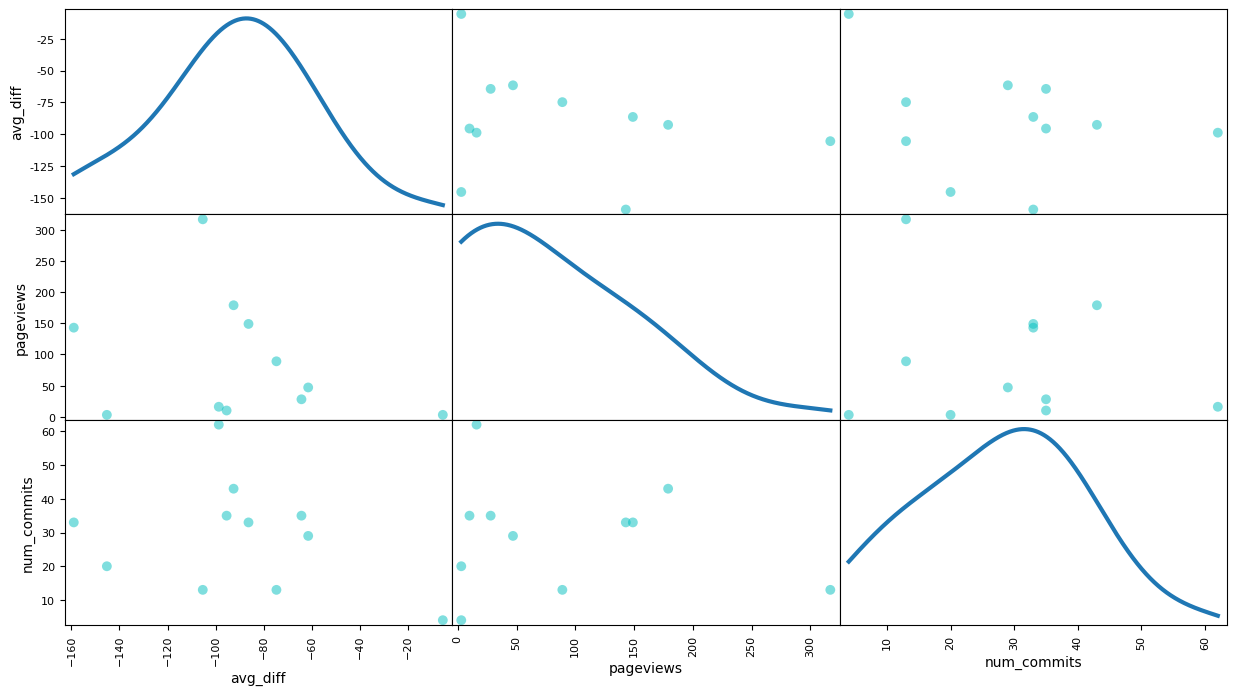

In [549]:
scatter_matrix(df, figsize=(15, 8), diagonal='kde', density_kwds={'linewidth': 3}, s=200, color='c')

## Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

In [ ]:
print("No")

## Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline

In [ ]:
print("No")

## Can we say that there are many users with a low number of commits and a few with a high number of commits

In [ ]:
print("Yes")

## Can we say that there are many users with a small average difference and a few with a large average difference

In [ ]:
print("No")

In [ ]:
con.close()